In [87]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load DMS and store object

In [100]:
sys.path.append('../')

from data_prep import dm_saver, data_manager

dms = dm_saver.DM_Saver.load('../dms')

dml = data_manager.Data_Manager()

dml.dms2dm(dms)
%store dml

Stored 'dml' (Data_Manager)


## Donating rows
At this point dataset B and C has a lot of missing values. We will exploit the fact that the two training sets are quite similar and donate missing values to each other.

In [89]:
from helpers import donate_missing_rows

donated_b, count_b = donate_missing_rows(dml.data_B, dml.data_C)
print('donated rows from C to B: ', count_b)
donated_c, count_c = donate_missing_rows(dml.data_C, dml.data_B)
print('donated rows from B to C: ', count_c)


donated rows from C to B:  3213
donated rows from B to C:  6022


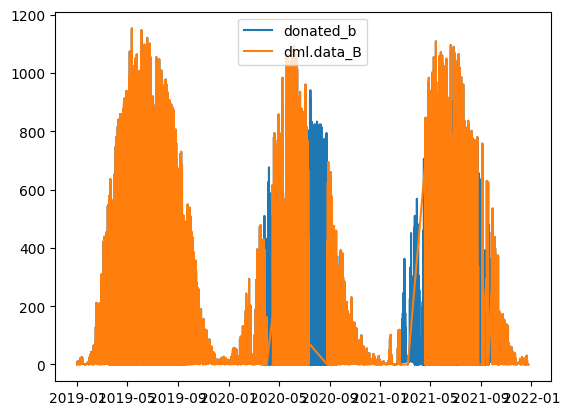

In [90]:

# plot donated_b and dml.data_B in the same plot

# filter dataframes by date_forecast
start_date = '2018'
end_date = '2022'

donated_b_filtered = donated_b[(donated_b['date_forecast'] >= start_date) & (donated_b['date_forecast'] <= end_date)]
dml_b_filtered = dml.data_B[(dml.data_B['date_forecast'] >= start_date) & (dml.data_B['date_forecast'] <= end_date)]

# plot the dataframes
plt.plot(donated_b_filtered['date_forecast'], donated_b_filtered['pv_measurement'], label='donated_b')
plt.plot(dml_b_filtered['date_forecast'], dml_b_filtered['pv_measurement'], label='dml.data_B')
plt.legend()
plt.show()


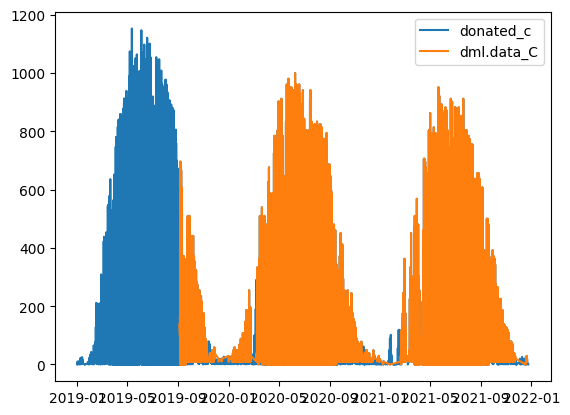

In [91]:
donated_c_filtered = donated_c[(donated_c['date_forecast'] >= start_date) & (donated_c['date_forecast'] <= end_date)]
dml_c_filtered = dml.data_C[(dml.data_C['date_forecast'] >= start_date) & (dml.data_C['date_forecast'] <= end_date)]

# plot the dataframes
plt.plot(donated_c_filtered['date_forecast'], donated_c_filtered['pv_measurement'], label='donated_c')
plt.plot(dml_c_filtered['date_forecast'], dml_c_filtered['pv_measurement'], label='dml.data_C')
plt.legend()
plt.show()

In [92]:
# set donated data

dml.data_B = donated_b
dml.data_C = donated_c

## Removing const y data

In [93]:
#dml.remove_constant_periods(10)
# dm.remove_constant_periods(30) # HR FREQUENCY
# dm.remove_constant_periods(200) # 15 MIN FREQUENCY

#dml.remove_constant_periods(2, [0.00, -0.00])

## Storing

In [94]:
%store dml

Stored 'dml' (Data_Manager)


In [95]:
# Save train data as csv (without id and date_foeecast)
# XA_csv = dml.data_A.drop(['date_forecast'], axis=1)
# XB_csv = dml.data_B.drop(['date_forecast'], axis=1)
# XC_csv = dml.data_C.drop(['date_forecast'], axis=1)

# XA_csv.to_csv('train_A.csv', index=False)
# XB_csv.to_csv('train_B.csv', index=False)
# XC_csv.to_csv('train_C.csv', index=False)